# Silph shiny rates model

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
import seaborn as sns

sns.set()

## Priors
(This didn't make it into the final video.)

Text(0.5, 1.0, 'rarity = 1 / p_shiny')

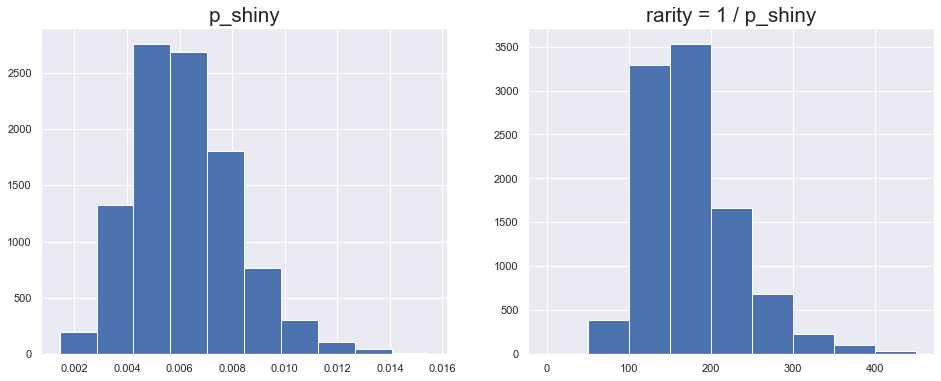

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].hist(pm.Beta.dist(10, 1600).random(size=10_000))
ax[1].hist(1. / pm.Beta.dist(10, 1600).random(size=10_000), bins=range(0, 500, 50))
ax[0].set_title("p_shiny", size="xx-large")
ax[1].set_title("rarity = 1 / p_shiny", size="xx-large")

## Data

In [3]:
from __future__ import annotations

In [4]:
def encounters_and_shiny(data: pd.DataFrame, species: str) -> tuple[int, int]:
    """
    Given the dataframe and a species, retrieve the number of encounters and
    number of shinies for that species.
    """
        
    row = data[data.name == species].iloc[0]
    return (row["n_encounters"], row["n_shiny"])

data = pd.read_csv("rates.csv").sort_values("date")
assert encounters_and_shiny(data, "yanma") == (4052, 37)
assert encounters_and_shiny(data, "horsea") == (7303, 64)

In [5]:
data

,url,date,name,n_encounters,n_shiny
9,https://thesilphroad.com/science/reflecting-po...,20190101,psyduck,10518,76
7,https://thesilphroad.com/science/reflecting-po...,20190401,diglett,43523,301
8,https://thesilphroad.com/science/reflecting-po...,20190401,shuckle,26978,204
6,https://thesilphroad.com/science/go-fest-weeke...,20190613,horsea,7303,64
5,https://thesilphroad.com/science/quick-discove...,20190704,nidoran_m,5722,53
4,https://thesilphroad.com/science/quick-discove...,20190727,sneasel,1588,13
3,https://thesilphroad.com/science/quick-discove...,20190806,poliwag,5627,40
2,https://thesilphroad.com/science/quick-discove...,20190903,gligar_later,4234,33
1,https://thesilphroad.com/science/quick-discove...,20190921,yanma,4052,37
0,https://thesilphroad.com/science/oddish-shiny-...,20191004,oddish,10988,94


## Model - January 2019

In [6]:
def sample(model: pm.Model) -> az.InferenceData:
    with model:
        samples = pm.sample(draws=2000, tune=1000, chains=4)
        idata = az.from_pymc3(samples)
        
    return idata

In [7]:
with pm.Model() as model:
    p_shiny = pm.Beta("p_shiny", 10, 1600)
    rarity = pm.Deterministic("rarity", 1. / p_shiny)
    
    n_psyduck, n_shiny_psyduck = encounters_and_shiny(data, "psyduck")
    pm.Binomial("psyduck", n_psyduck, p_shiny, observed=n_shiny_psyduck)

### Prior predictive checks

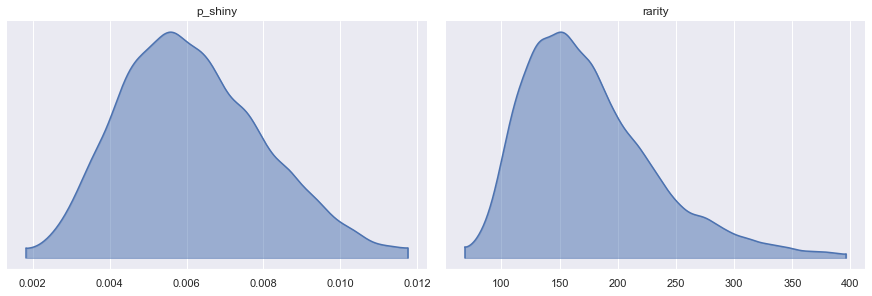

In [8]:
prior_samples = pm.sample_prior_predictive(samples=10_000, model=model)
_ = az.plot_density(
    prior_samples,
    var_names=["p_shiny", "rarity"],
    point_estimate=None,
    shade=0.5,
    hdi_prob=0.99,
    figsize=(12, 4),
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_shiny]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


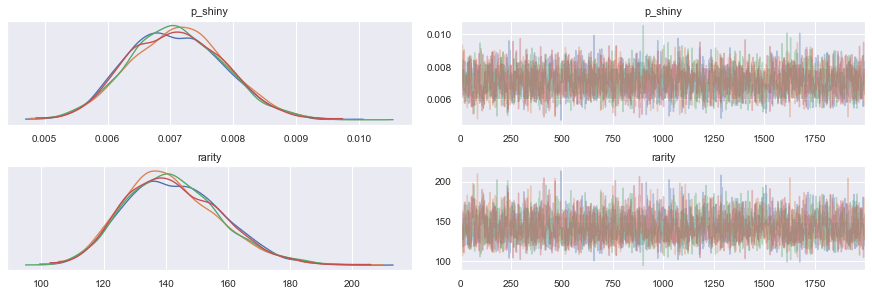

In [9]:
idata = sample(model)
_ = az.plot_trace(idata)

## April 2019

In [10]:
with model:
    n_diglett, n_shiny_diglett = encounters_and_shiny(data, "diglett")
    n_shuckle, n_shiny_shuckle = encounters_and_shiny(data, "shuckle")
    pm.Binomial("diglett", n_diglett, p_shiny, observed=n_shiny_diglett)
    pm.Binomial("shuckle", n_shuckle, p_shiny, observed=n_shiny_shuckle)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_shiny]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.


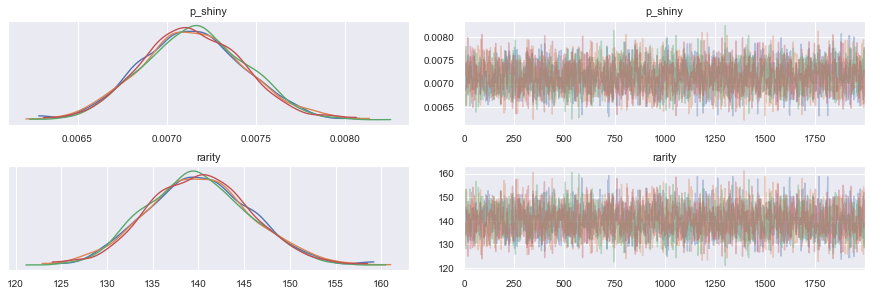

In [11]:
idata = sample(model)
_ = az.plot_trace(idata)

## June 2019 - horsea

In [12]:
with model:
    n_horsea, n_shiny_horsea = encounters_and_shiny(data, "horsea")
    pm.Binomial("horsea", n_horsea, p_shiny, observed=n_shiny_horsea)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_shiny]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.


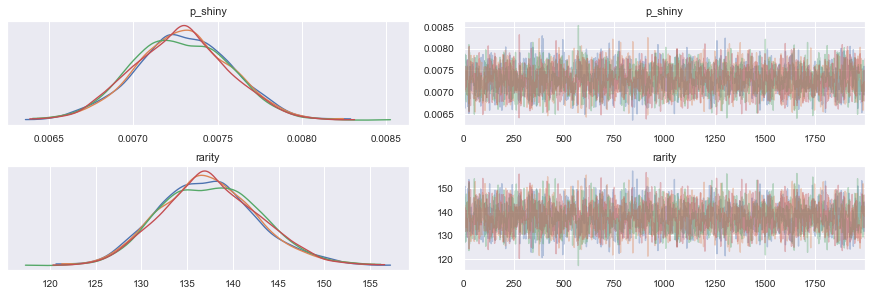

In [13]:
idata = sample(model)
_ = az.plot_trace(idata)

## July 2019 - nidoran_m, sneasel

In [14]:
with model:
    n_nidoran_m, n_shiny_nidoran_m = encounters_and_shiny(data, "nidoran_m")
    n_sneasel, n_shiny_sneasel = encounters_and_shiny(data, "sneasel")

    pm.Binomial("nidoran_m", n_nidoran_m, p_shiny, observed=n_shiny_nidoran_m)
    pm.Binomial("sneasel", n_sneasel, p_shiny, observed=n_shiny_sneasel)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_shiny]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 14 seconds.


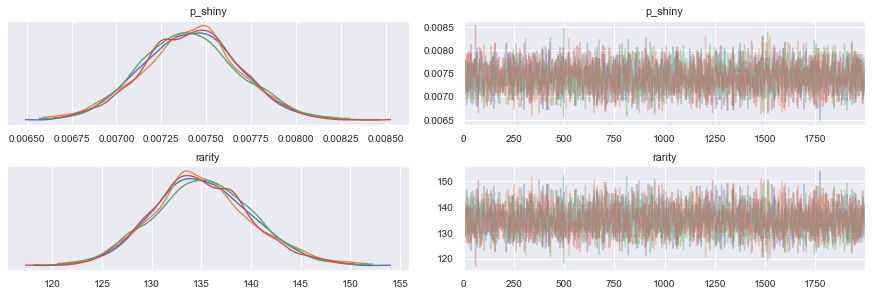

In [15]:
idata = sample(model)
_ = az.plot_trace(idata)

## Poliwag - august

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_shiny]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


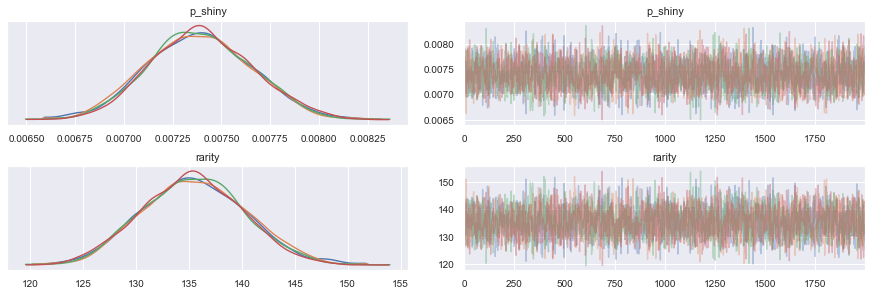

In [16]:
with model:
    n_poliwag, n_shiny_poliwag = encounters_and_shiny(data, "poliwag")
    pm.Binomial("poliwag", n_poliwag, p_shiny, observed=n_shiny_poliwag)

idata = sample(model)
_ = az.plot_trace(idata)

## September - gligar, yanma

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_shiny]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


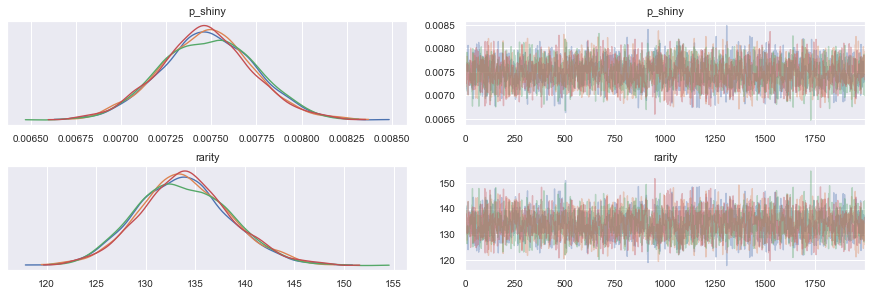

In [17]:
with model:
    n_gligar, n_shiny_gligar = encounters_and_shiny(data, "gligar_later")
    pm.Binomial("gligar", n_gligar, p_shiny, observed=n_shiny_gligar)

    n_yanma, n_shiny_yanma = encounters_and_shiny(data, "yanma")
    pm.Binomial("yanma", n_yanma, p_shiny, observed=n_shiny_yanma)

idata = sample(model)
_ = az.plot_trace(idata)

## October - oddish

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_shiny]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 14 seconds.


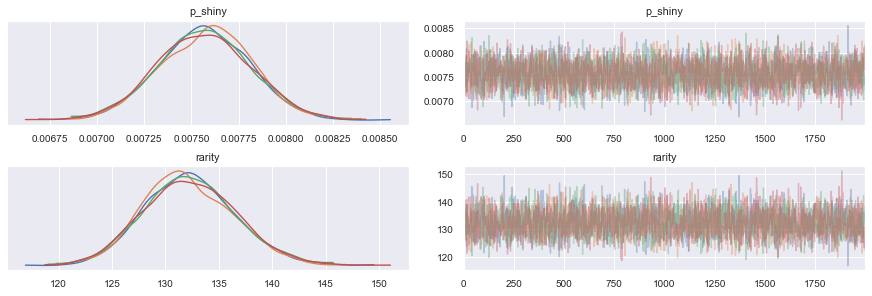

In [18]:
with model:
    n_oddish, n_shiny_oddish = encounters_and_shiny(data, "oddish")
    pm.Binomial("oddish", n_oddish, p_shiny, observed=n_shiny_oddish)
    

idata = sample(model)
_ = az.plot_trace(idata)

After all of this, we see that it is very unlikely that the shiny rate is 1/150 ... provided our assumptions were accurate.

## Another way? A pooled model

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_shiny]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 12 seconds.
The acceptance probability does not match the target. It is 0.889523155885365, but should be close to 0.8. Try to increase the number of tuning steps.


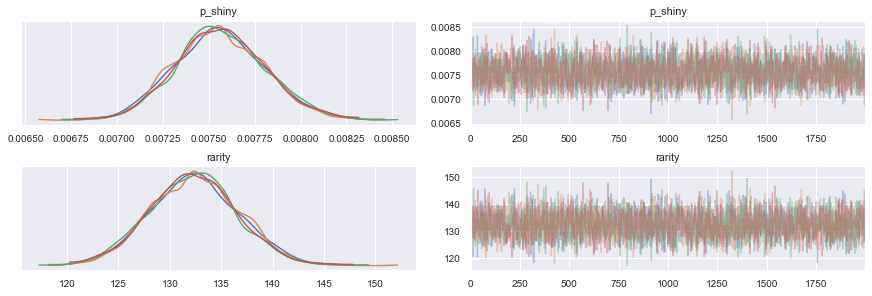

In [19]:
with pm.Model() as pooled_model:
    p_shiny = pm.Beta("p_shiny", 10, 1600)
    rarity = pm.Deterministic("rarity", 1/p_shiny)
    obs = pm.Binomial("obs", data.sum()["n_encounters"], p_shiny, observed=data.sum()["n_shiny"])
    
idata_pooled = sample(pooled_model)
_ = az.plot_trace(idata_pooled)